In [3]:
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from LogisticRegression import LogisticRegression
from MultilayerPerceptron import MultilayerPerceptron
from plot_confusion_matrix import plot_confusion_matrix

In [4]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=41)

In [6]:
LR_Model = LogisticRegression(learning_rate=0.01, num_iterations=1000)

LR_Model.fit(X_train, y_train)

y_pred = LR_Model.predict(X_test)

logistic_regression_confusuion_matrix = LR_Model.confusion_matrix(y_test, y_pred)
accuracy, precision, recall, f1_score = LR_Model.metrics(logistic_regression_confusuion_matrix)

print('Confusion Matrix:\n', logistic_regression_confusuion_matrix)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

Confusion Matrix:
 [[99  0]
 [53  2]]
Accuracy: 0.6558441558441559
Precision: 1.0
Recall: 0.03636363636363636
F1 Score: 0.07017543859649122


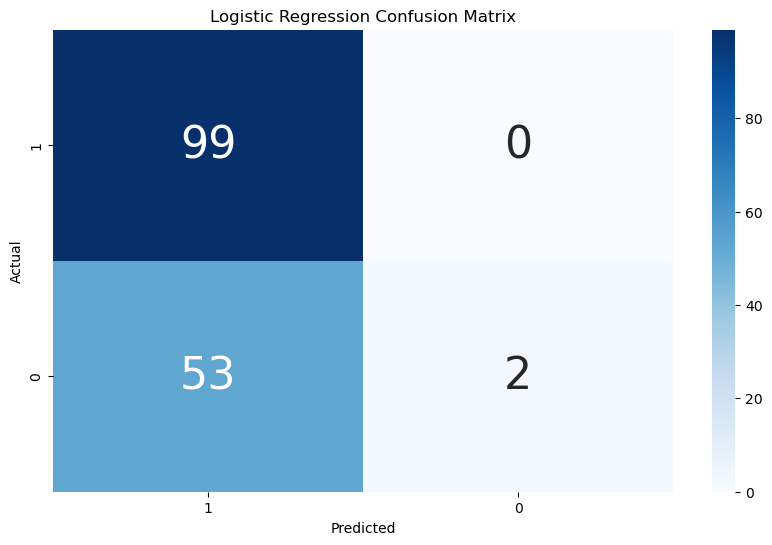

In [7]:
plot_confusion_matrix(logistic_regression_confusuion_matrix, title='Logistic Regression Confusion Matrix')

In [8]:
X_train_tensor = torch.from_numpy(X_train).float()
X_test_tensor = torch.from_numpy(X_test).float()
y_train_tensor = torch.from_numpy(y_train).long()
y_test_tensor = torch.from_numpy(y_test).long()

Epoch 0, Training Loss: 18.39693832397461 - Training Accuracy: 0.653094470500946
Epoch 100, Training Loss: 0.575971245765686 - Training Accuracy: 0.7068403959274292
Epoch 200, Training Loss: 0.5478078126907349 - Training Accuracy: 0.732899010181427
Epoch 300, Training Loss: 0.5269924402236938 - Training Accuracy: 0.7410423159599304
Epoch 400, Training Loss: 0.5060441493988037 - Training Accuracy: 0.7475569844245911
Epoch 500, Training Loss: 0.48255839943885803 - Training Accuracy: 0.7605863213539124
Epoch 600, Training Loss: 0.4608320891857147 - Training Accuracy: 0.7899022698402405
Epoch 700, Training Loss: 0.44341230392456055 - Training Accuracy: 0.791530966758728
Epoch 800, Training Loss: 0.4342099726200104 - Training Accuracy: 0.7980455756187439
Epoch 900, Training Loss: 0.4249682128429413 - Training Accuracy: 0.8094462752342224


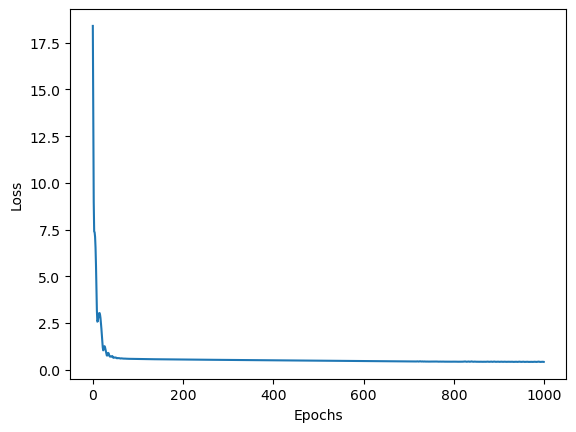

In [9]:
mlp = MultilayerPerceptron(input_size=X_train_tensor.shape[1], hidden_size=X_train_tensor.shape[1]*2, output_size=2, activation="relu")
mlp.fit(X_train_tensor, y_train_tensor, epochs=1000)

In [10]:
y_pred = mlp.predict(X_test_tensor)
y_pred = torch.argmax(y_pred, dim=1)
mlp_confusion_matrix = mlp.confusion_matrix(y_test_tensor, y_pred)
accuracy, precision, recall, f1_score = mlp.metrics(mlp_confusion_matrix)

print('Confusion Matrix:\n', mlp_confusion_matrix)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1_score)

Confusion Matrix:
 [[87 12]
 [22 33]]
Accuracy: 0.7792207792207793
Precision: 0.7333333333333333
Recall: 0.6
F1 Score: 0.6599999999999999


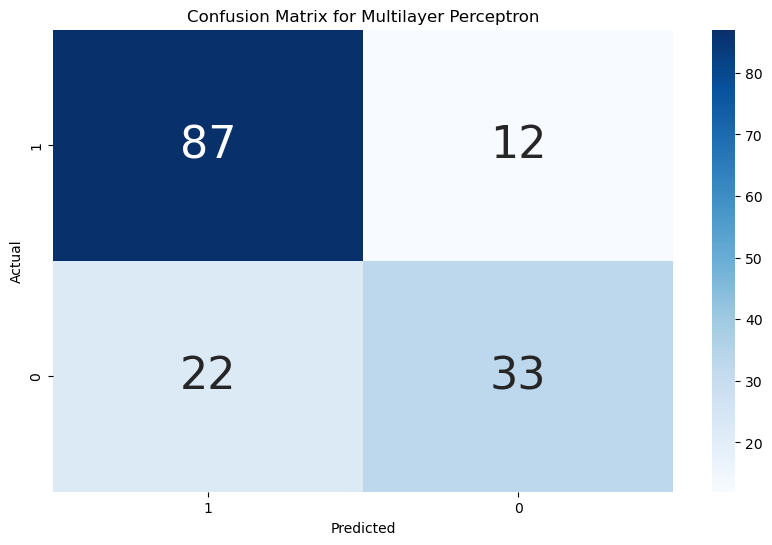

In [11]:
plot_confusion_matrix(mlp_confusion_matrix, "Confusion Matrix for Multilayer Perceptron")